### Diamond price prediction

Aim : To explore the factors that affect the price of a diamond with a goal of finding a model to help predict the price of diamonds.



In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#os.chdir(r'C:\Users\shameel\Downloads')
os.chdir(r'C:\Users\Yogesh\Downloads\Dataset')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import  mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor

### About The Dataset:

#### Context:

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#### Content:

price price in US dollars 

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

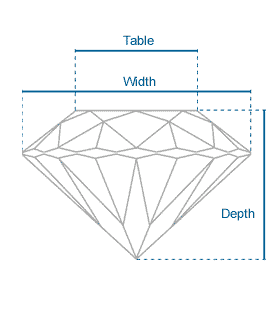

In [2]:
#reading data
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# number of rows and columns
df.shape

(53940, 11)

#### Exploratory data analysis:

In [4]:
# checking if there is any null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
#identify data types 
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

From the above information we can see that there is no null values.

In [6]:
# describing the dataset in a statistically
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


we can see that there are 0 values for x,y,z Which cannot be True. So,they have to be removed.

Drop the 'Unnamed: 0' column as we already have Index.


In [7]:
#removing unwanted column
df = df.drop(df[['Unnamed: 0']],axis = 1)

### Data Manipulation:

The Size of the diamond cannot be zero so x or y or z can never be zero therefore remove those rows which has dimensions as zero

In [8]:
# Counting the number of zero in each dimension
print('Count of x=0:',(df['x']==0).sum(), '\nCount of y=0:',(df['y']==0).sum(),\
      '\nCount of z=0:',(df['z']==0).sum())

Count of x=0: 8 
Count of y=0: 7 
Count of z=0: 20


In [9]:
# dropping the rows which has dimension as zero
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

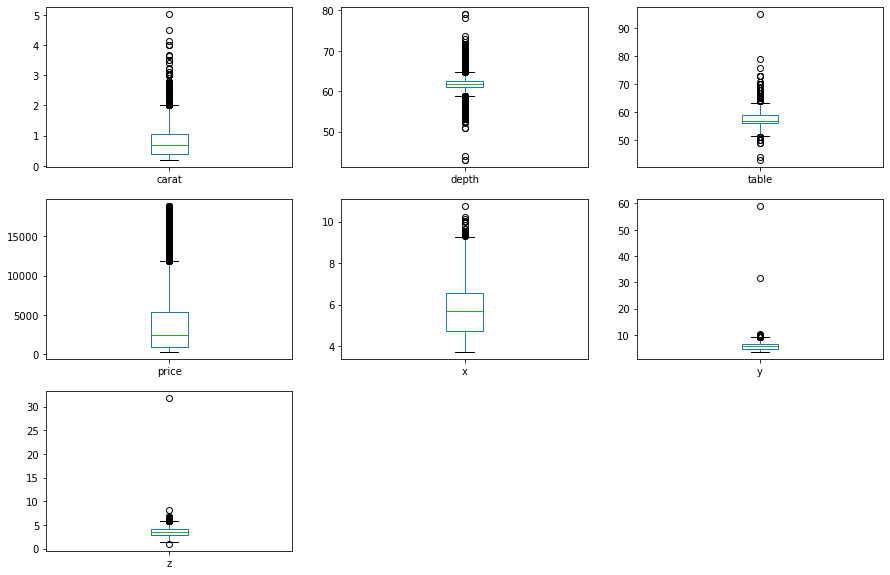

In [10]:
#plotting Boxplot for every numerical feature
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

From the above Graph We can observe that every feature has Outliers so remove every Outliers.

In [11]:
#function to replace all the outliers to NaN 
def outliers(var):
    a = []
    q1 = df[var].quantile(.25)
    q2 = df[var].quantile(.5)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df[var]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

#replacing outliers with NaN in the dataframe
for col in df.select_dtypes(exclude='object').columns:
    df[col] = outliers(col)
    

In [12]:
#dropping all The NaN values
df1 = df.dropna()

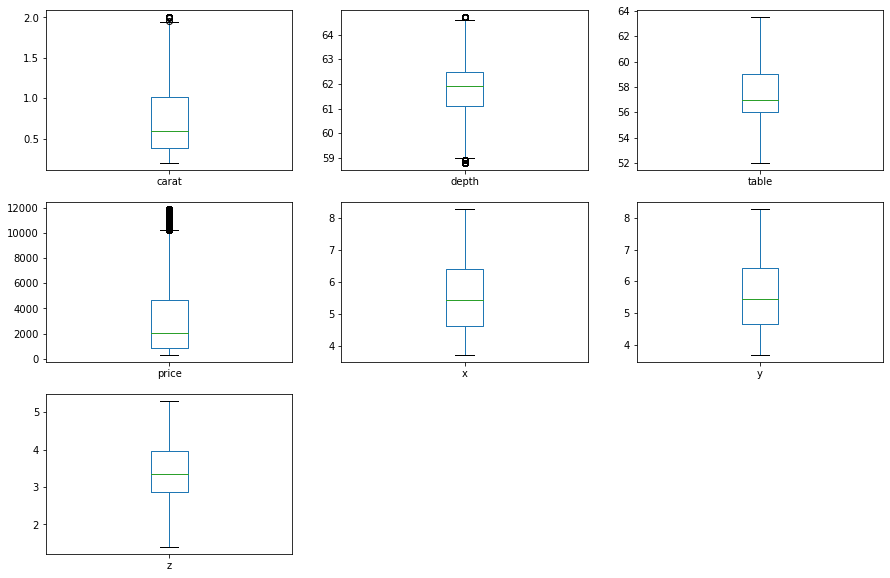

In [13]:
# boxplot After Removing Outliers
df1.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

<AxesSubplot:xlabel='color', ylabel='price'>

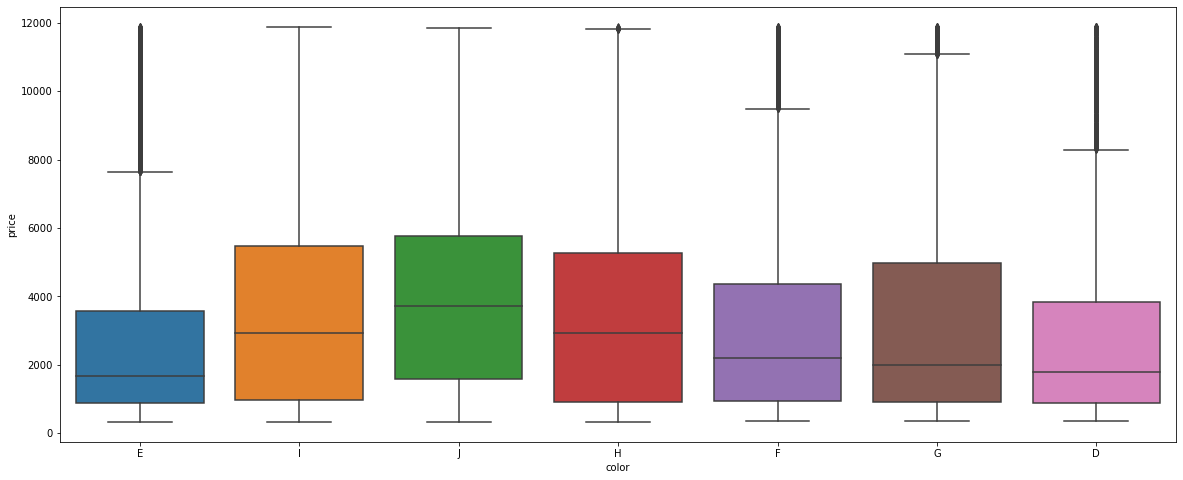

In [14]:
#boxplot with respect color wit respect to price
plt.figure(figsize = (20,8))
sns.boxplot(x = 'color' , y = 'price' ,data = df)

<AxesSubplot:xlabel='cut', ylabel='price'>

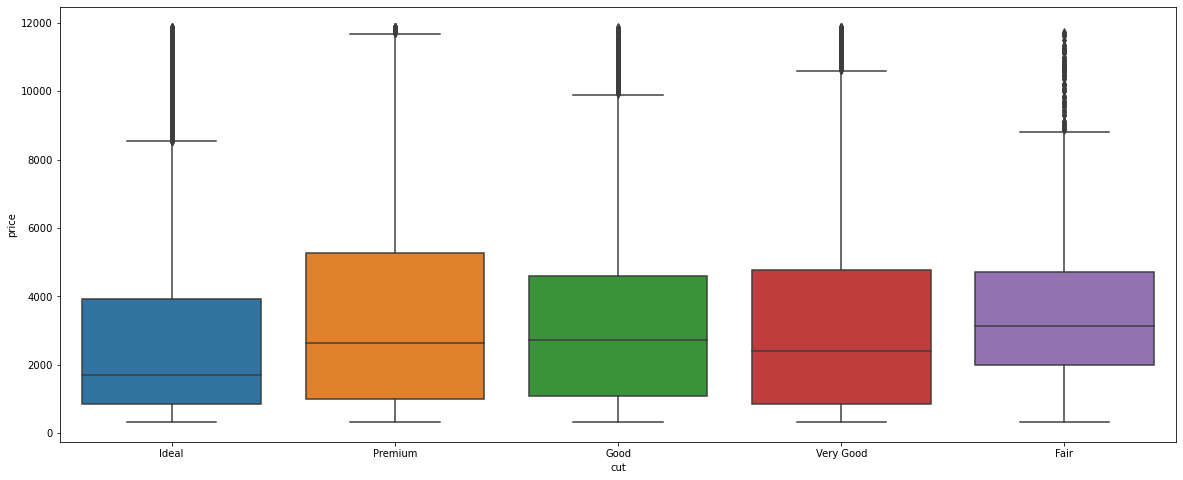

In [15]:
#boxplot with respect cut wit respect to price
plt.figure(figsize = (20,8))
sns.boxplot(x = 'cut' , y = 'price' ,data = df)

<AxesSubplot:xlabel='clarity', ylabel='price'>

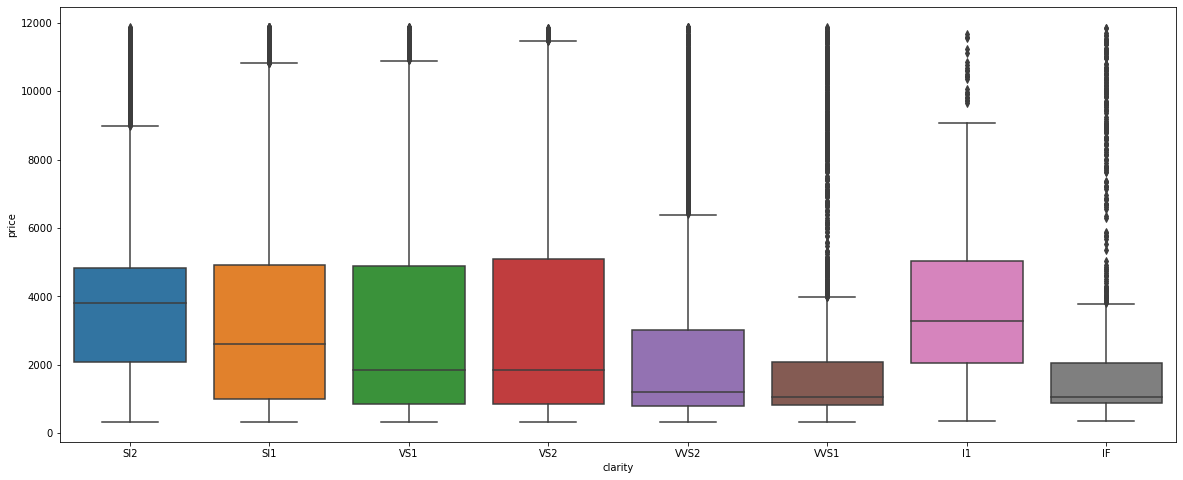

In [16]:
#boxplot with respect clarity wit respect to price
plt.figure(figsize = (20,8))
sns.boxplot(x = 'clarity' , y = 'price' ,data = df)

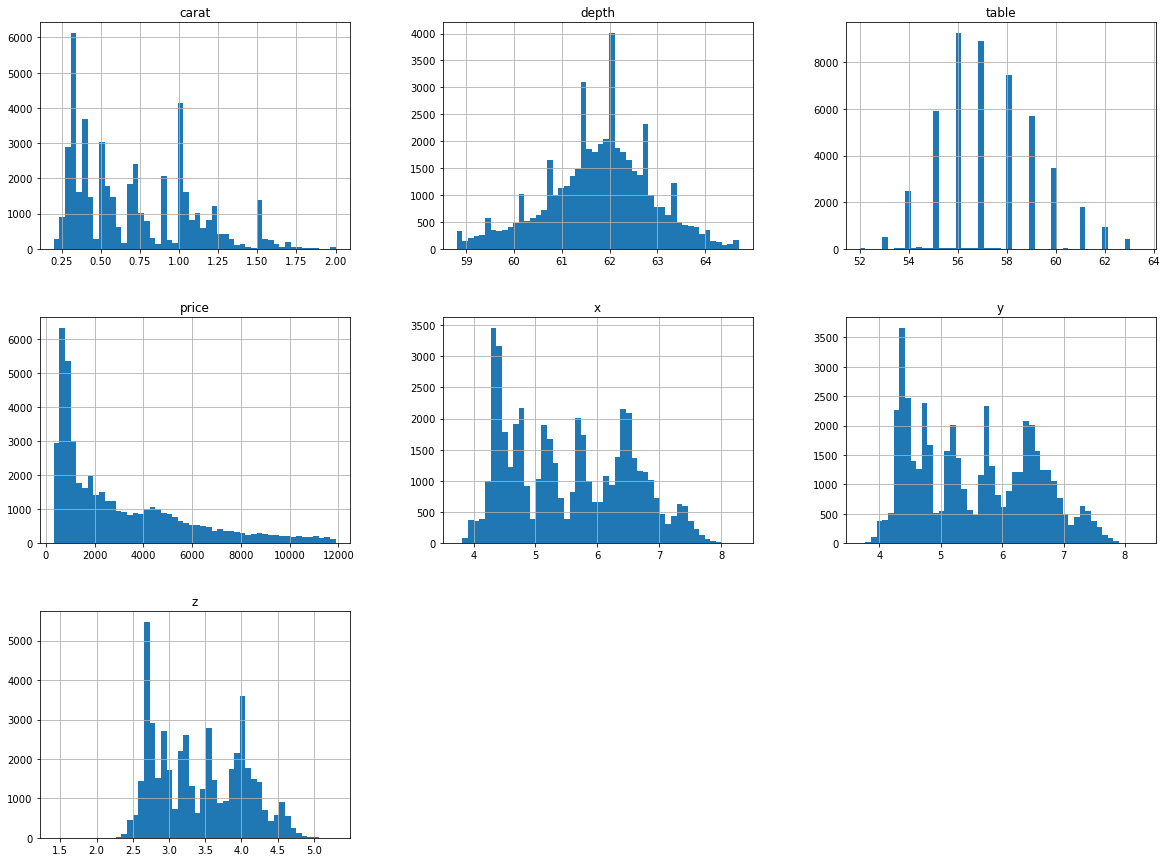

In [17]:
#Histogram for continues variable
df1.hist(bins = 50, figsize = (20, 15))
plt.show()

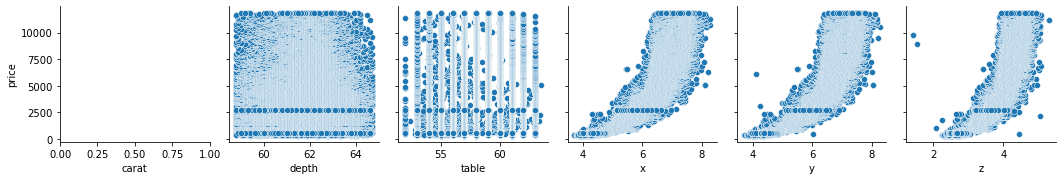

In [18]:
# scatter plot for the Features Before Log Transformation
sns.pairplot(data=df1,
             x_vars=(df1.drop(['clarity', 'cut', 'color', 'price'], axis=1)).columns,
             y_vars=['price'],
             kind='scatter')

<AxesSubplot:title={'center':'price Plot'}, ylabel='Density'>

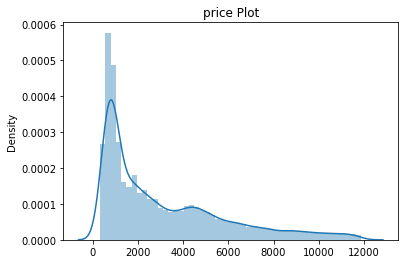

In [19]:
plt.title('price Plot')
sns.distplot(df1[['price']])

In [20]:
#performing log Transformation on price
df1["log_carat"] = df1["carat"].apply(np.log)
df1['Log_price'] = np.log(df['price'])

<AxesSubplot:title={'center':'Log Price Plot'}, ylabel='Density'>

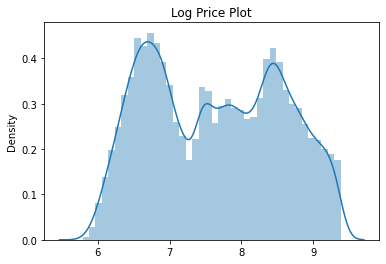

In [21]:
plt.title('Log Price Plot')
sns.distplot(df1[['Log_price']])

<AxesSubplot:title={'center':'carat'}, ylabel='Density'>

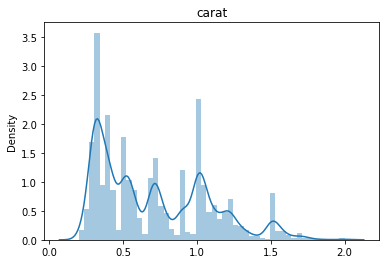

In [22]:
plt.title('carat')
sns.distplot(df1[['carat']])

<AxesSubplot:ylabel='Density'>

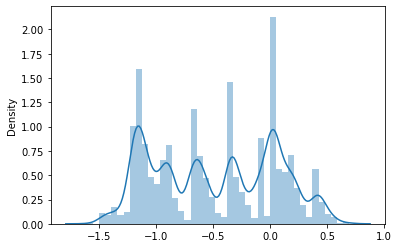

In [23]:
sns.distplot(np.log(df1[['carat']]))

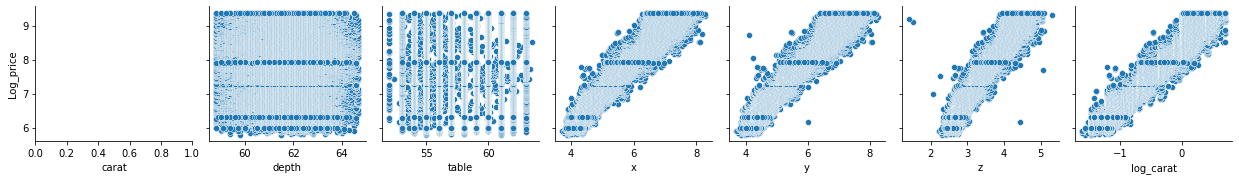

In [24]:
sns.pairplot(data=df1,
             x_vars=(df1.drop(['clarity', 'cut', 'color', 'price','Log_price'], axis=1)).columns,
             y_vars=['Log_price'],
             kind='scatter')

The Scatter plot Before the Log transformation is a bit skewed and After the log transformation the sactter plot looks less skwewed which is good for our prediction

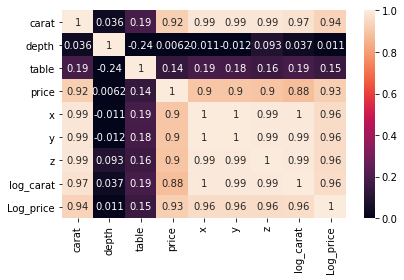

In [25]:
# plotting Heatmap

fig, ax = plt.subplots()


sns.heatmap(df1.corr(), annot=True, vmin=0, vmax=1)  #here define the range

fig.tight_layout()
plt.show()

From the heat map we can Tell that :

1) The corelation for x,y,z and carat with price is more than 0.9 which is good for the prediction

2) after The log transformation of price, the corelation between log_price and other features is greater than what we got for price.

# Label Encoding to catagorial ordinal variable

**Cut is quality of the cut (Fair, Good, Very Good, Premium, Ideal)**

**Color is diamond colour, from J (worst) to D (best)**

**Clarity is a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**

In [26]:
cut_labels = {'Fair':0, 
               'Ideal':1, 
               'Good':2,
               'Very Good':3,
               'Premium':4}
df1['cut'] = df1['cut'].map(cut_labels)

In [27]:
color_label = {'D' :0 , 'E' : 1,'F' : 2 , 'G': 3,'H': 4 , 'I' : 5,'J' : 6}
df1['color'] = df1['color'].map(color_label)

In [28]:
clarity_label = {'SI2' : 0 , 'SI1' : 1,'VS2' : 2 , 'VS1': 3,'VVS2': 4 , 'VVS1' : 5,'I1' : 6,'IF' : 7}
df1['clarity'] = df1['clarity'].map(clarity_label)

In [29]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,Log_price
0,0.23,1,1,0,61.5,55.0,326.0,3.95,3.98,2.43,-1.469676,5.786897
1,0.21,4,1,1,59.8,61.0,326.0,3.89,3.84,2.31,-1.560648,5.786897
3,0.29,4,5,2,62.4,58.0,334.0,4.20,4.23,2.63,-1.237874,5.811141
4,0.31,2,6,0,63.3,58.0,335.0,4.34,4.35,2.75,-1.171183,5.814131
5,0.24,3,6,4,62.8,57.0,336.0,3.94,3.96,2.48,-1.427116,5.817111
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,0,1,60.8,57.0,2757.0,5.75,5.76,3.50,-0.328504,7.921898
53936,0.72,2,0,1,63.1,55.0,2757.0,5.69,5.75,3.61,-0.328504,7.921898
53937,0.70,3,0,1,62.8,60.0,2757.0,5.66,5.68,3.56,-0.356675,7.921898
53938,0.86,4,4,0,61.0,58.0,2757.0,6.15,6.12,3.74,-0.150823,7.921898


# VIF

In [30]:

X = df1.drop(['price','Log_price','x','y','depth','table','z'],axis = 1)
vif = pd.DataFrame()
vif["VIF Value"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Value,features
0,5.862940,carat
1,4.368980,cut
2,3.617864,color
3,3.095194,clarity
4,2.896809,log_carat


Checking multicollinearity before impelementing in model 

In [31]:
df2 = df1.copy()

###  Initial model fitting setup 

In [32]:
df1_cat = df1[['cut','color','clarity']]
df1_num = df1[['carat','depth','table','price','x','y','z','Log_price']]

In [33]:
# split into train , validation and  test sets
data,test = train_test_split(df1, test_size=0.125,random_state=8)
# split into train test sets
train,valid = train_test_split(data, test_size=0.125, random_state=8)
df1 =  train
print('Size of train data :' ,len(train))
print('Size of valid data :' ,len(valid))
print('Size of test data :' ,len(test))

Size of train data : 36385
Size of valid data : 5198
Size of test data : 5941


In [34]:
#scaling
scaler = MinMaxScaler()
scaler.fit(train )
scaled = pd.DataFrame(scaler.transform(train), index=train.index, columns=train .columns)
scaled

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,Log_price
33653,0.105556,1.00,0.166667,0.000000,0.711864,0.782609,0.043956,0.206278,0.204793,0.388175,0.290035,0.261219
30909,0.077778,0.75,0.166667,0.285714,0.644068,0.521739,0.036255,0.156951,0.167756,0.352185,0.230449,0.229837
49590,0.183333,0.75,0.500000,0.714286,0.016949,0.695652,0.156615,0.336323,0.352941,0.434447,0.423246,0.522750
52718,0.205556,0.25,0.333333,0.714286,0.593220,0.260870,0.192870,0.354260,0.357298,0.488432,0.454845,0.572561
7947,0.483333,0.25,0.833333,0.285714,0.389831,0.434783,0.345505,0.656951,0.636166,0.678663,0.728354,0.718550
...,...,...,...,...,...,...,...,...,...,...,...,...
30062,0.061111,0.25,0.166667,0.285714,0.627119,0.173913,0.034092,0.134529,0.150327,0.336761,0.190332,0.220345
3911,0.333333,0.25,0.500000,0.285714,0.559322,0.434783,0.274120,0.497758,0.505447,0.591260,0.602060,0.659602
47052,0.283333,1.00,0.833333,0.000000,0.254237,0.521739,0.129359,0.446188,0.457516,0.529563,0.550228,0.478381
3797,0.283333,0.25,0.166667,0.428571,0.271186,0.434783,0.271524,0.452915,0.464052,0.534704,0.550228,0.657203


In [35]:
from sklearn.preprocessing import StandardScaler

# Perform the feature scaling on the numeric attributes of the dataset valid
num_scaler = StandardScaler()
diamonds_num_scaled = num_scaler.fit_transform(valid)

# Preview 
valid.std = pd.DataFrame(diamonds_num_scaled,index=valid.index,columns=valid .columns)
valid.std

# # Perform the feature scaling on the numeric attributes of the dataset train
num_scaler = StandardScaler()
diamonds_num_scaled = num_scaler.fit_transform(train)

# Preview 
df.std = pd.DataFrame(diamonds_num_scaled,index=train.index,columns=train .columns)
df.std

# # Perform the feature scaling on the numeric attributes of the dataset test
num_scaler = StandardScaler()
diamonds_num_scaled = num_scaler.fit_transform(test)

# Preview 
df.test = pd.DataFrame(diamonds_num_scaled,index=test.index,columns=test .columns)
df.test

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,Log_price
43993,-1.092077,0.565579,-0.310266,-1.278705,0.349915,0.37758,-0.979043,-1.345423,-1.245957,-1.260864,-1.342638,-1.781323
16534,0.824304,1.351937,-0.905068,-0.120570,-0.922440,1.37116,1.294725,0.947003,0.917615,0.822093,0.938042,1.266758
29793,-1.092077,-1.007136,-1.499870,-0.699638,-0.104497,-0.61600,-0.863744,-1.212380,-1.266562,-1.244333,-1.342638,-1.146162
19148,1.499086,0.565579,0.284536,-0.699638,1.349624,0.37758,1.772026,1.376833,1.340027,1.516412,1.353553,1.461520
11844,1.148199,1.351937,0.879338,-0.699638,0.440798,0.37758,0.743852,1.161918,1.175183,1.218847,1.148966,0.987244
...,...,...,...,...,...,...,...,...,...,...,...,...
28908,-1.092077,-0.220778,0.284536,1.037565,1.531389,-0.61600,-0.872895,-1.273784,-1.235654,-1.128613,-1.342638,-1.184972
13069,1.418112,1.351937,2.068942,0.458498,0.804328,0.37758,0.857687,1.284727,1.319422,1.400693,1.308280,1.051227
51885,-0.390304,-1.007136,-0.905068,1.037565,-0.286262,-0.11921,-0.234175,-0.270848,-0.205382,-0.268980,-0.169997,0.185102
21047,-1.065086,-1.007136,0.879338,1.037565,0.531681,-0.11921,-0.894490,-1.243082,-1.215049,-1.178207,-1.281034,-1.282495


In [36]:
data,test = train_test_split(df1, test_size=0.125,random_state=8)
# split into train test sets
train,valid = train_test_split(data, test_size=0.125, random_state=8)
#df1 =  train
print('Size of train data :' ,len(train))
print('Size of valid data :' ,len(valid))
print('Size of test data :' ,len(test))

Size of train data : 27856
Size of valid data : 3980
Size of test data : 4549


In [37]:
#scaling
scaler = MinMaxScaler()
scaler.fit(df1 )
scaled = pd.DataFrame(scaler.transform(df1), index=df1.index, columns=df1 .columns)
scaled

#standartard
num_scaler = StandardScaler()
diamonds_num_scaled = num_scaler.fit_transform(df1)
df.std = pd.DataFrame(diamonds_num_scaled,index=df1.index,columns=df1.columns)

# Model 1 

In [38]:
import statsmodels.api as sm
x = df.std.drop(['Log_price','price','z','x','y','depth','table','log_carat'],axis=1)             #all column in except joblevel
y = df.std[['Log_price']] 
x = sm.add_constant(x)
m = sm.OLS(y,x)
f = m.fit()
print(f.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 9.453e+04
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:36:19   Log-Likelihood:                -7363.9
No. Observations:               36385   AIC:                         1.474e+04
Df Residuals:                   36380   BIC:                         1.478e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.719e-15      0.002  -1.11e-12      1.0

even though  model is performing good but we need to rectify the skewness caratin model to have much more generalized model

# Model - 2

In [39]:
import statsmodels.api as sm
#x = ldf.drop(['Log_price','price','z','x','y','depth','table'],axis=1)             #all column in except joblevel
x = df1[['cut','color','clarity','log_carat']]
y = df1[['Log_price']] 
x = sm.add_constant(x)
m = sm.OLS(y,x)
f = m.fit()
print(f.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.459e+05
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:36:19   Log-Likelihood:                 11824.
No. Observations:               36385   AIC:                        -2.364e+04
Df Residuals:                   36380   BIC:                        -2.360e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5215      0.003   2976.485      0.0

Here we can see than all the feature are significate & Adj R-Square is better than previous model.Lets check how good it generalize with the test data.

In [40]:
X_train = train[['cut','color','clarity','log_carat']]
Y_train = train[['Log_price']]
X_test = valid[['cut','color','clarity','log_carat']]
Y_test = valid[['Log_price']]


In [41]:
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train,Y_train)        #fitting the model
Y_pred = lr.predict(X_test)    #predicted value
# Y_pred = 
# Y_test = 
print(f'Adjusted Adj. R-squared  : {lr.score(X_train,Y_train)}')
print(f'MSE                      :{np.mean((np.exp(Y_test) - np.exp(Y_pred))**2)[0]}')
print(f'RMSE                     :{np.sqrt(np.mean((np.exp(Y_test) - np.exp(Y_pred))**2)[0])}')

Adjusted Adj. R-squared  : 0.9644708282813215
MSE                      :942265.8132595139
RMSE                     :970.7037721465359


In [42]:
X_train = train[['cut','color','clarity','log_carat']]
Y_train = train[['Log_price']]
X_test = test[['cut','color','clarity','log_carat']]
Y_test = test[['Log_price']]


In [43]:
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train,Y_train)        #fitting the model
Y_pred = lr.predict(X_test)    #predicted value
# Y_pred = 
# Y_test = 
print(f'Adjusted Adj. R-squared  : {lr.score(X_train,Y_train)}')
print(f'MSE                      :{np.mean((np.exp(Y_test) - np.exp(Y_pred))**2)[0]}')
print(f'RMSE                     :{np.sqrt(np.mean((np.exp(Y_test) - np.exp(Y_pred))**2)[0])}')

Adjusted Adj. R-squared  : 0.9644708282813215
MSE                      :786151.1612912378
RMSE                     :886.6516572427065


In [44]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 20, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation


print("The average value obtained in 20-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 20-fold cross-validation is : ", max(scores))

The average value obtained in 20-fold cross-validation is :  0.964431744462068
The maximum value obtained in 20-fold cross-validation is :  0.9687852784657865


**since our model 2 is  gives optimal result  than model 1 i would suggest to gohead with model 2**

### KNeighborsRegressor

In [45]:
#defining the independent and dependent variable
x =  df2.drop(['price'],axis = 1)
y = df2[['price']]

In [46]:
# splitting test and Train data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0) 

In [47]:
# shape of train and test data
print('shape of xtrain is {}'.format(xtrain.shape))
print('shape of xtest is {}'.format(xtest.shape))
print('shape of ytrain is {}'.format(ytrain.shape))
print('shape of ytest is {}'.format(ytest.shape))

shape of xtrain is (38019, 11)
shape of xtest is (9505, 11)
shape of ytrain is (38019, 1)
shape of ytest is (9505, 1)


In [48]:
#standardizing independent variables
sc = StandardScaler()
x_train = sc.fit_transform(xtrain)
x_test = sc.transform(xtest)

In [49]:
#fitting the model and finding the accuracy
kn = KNeighborsRegressor()
kn.fit(xtrain,ytrain)
crossval = cross_val_score(estimator = kn, X = xtrain, y = ytrain, cv = 5,verbose = 1)
y_pred = kn.predict(xtest)
print('KNeighbors Regressor')
print('cross validation score')
print(crossval)
print('Average cross validation score = {}'.format(np.mean(crossval)))
print('mean absolute error = {}'.format(mean_absolute_error(ytest, y_pred)))
print('mean squared error = {}'.format(mean_squared_error(ytest, y_pred)))
print('root mean squared error = {}'.format(np.sqrt(mean_squared_error(ytest, y_pred))))
print('r2 score = {}'.format(r2_score(ytest, y_pred)))
print('accuracy = {}'.format(kn.score(xtest,ytest)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


KNeighbors Regressor
cross validation score
[0.96769576 0.96479515 0.96776375 0.9671114  0.96584309]
Average cross validation score = 0.9666418277054944
mean absolute error = 284.9457969489742
mean squared error = 254516.36256707
root mean squared error = 504.4961472271815
r2 score = 0.9665249867529928
accuracy = 0.9665249867529928


In [50]:
xtest['predicted_price'] = y_pred
xtest['actual_price'] = ytest

In [51]:
#comparing the predicted values to teh actual values
xtest

,carat,cut,color,clarity,depth,table,x,y,z,log_carat,Log_price,predicted_price,actual_price
52048,0.80,3,3,0,63.1,59.0,5.85,5.78,3.67,-0.223144,7.804251,2758.4,2451.0
20891,1.04,1,2,4,62.2,56.0,6.46,6.53,4.04,0.039221,9.117677,9526.4,9115.0
1661,0.90,3,6,2,63.1,59.0,6.09,6.05,3.83,-0.105361,8.014336,3133.2,3024.0
47582,0.72,4,6,3,63.0,56.0,5.72,5.67,3.59,-0.328504,7.536364,2410.4,1875.0
44838,0.60,4,1,1,60.8,58.0,5.46,5.50,3.33,-0.510826,7.393263,1652.0,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18437,1.50,2,4,0,64.3,57.0,7.18,7.15,4.61,0.405465,8.922658,6473.6,7500.0
32702,0.31,1,2,2,60.8,57.0,4.39,4.36,2.66,-1.171183,6.687109,817.8,802.0
39147,0.32,1,2,5,61.1,56.0,4.45,4.42,2.71,-1.139434,6.966967,956.2,1061.0
8912,1.00,4,3,1,62.5,59.0,6.35,6.29,3.95,0.000000,8.410276,4663.2,4493.0
